Installing and importing the different libraries to analyse the association between suicide rate and pychosocial care centers (CAPS).

CAPS are centers specialized in mental health, with teams coposed of nurses, psychiatric physicians, therapeutical assistants and orthers to help people with mental suffering.

In [37]:
pip install scikit-posthocs

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.ticker as mticker
from scipy.stats import shapiro, levene, f_oneway, kruskal, spearmanr
import scikit_posthocs as sp
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pd.options.display.max_columns = None

We used the suicide numbers from Brazil, instead of dividing by regions.

In [39]:
df = pd.read_csv('Brazil_ML_ready.csv')

In [40]:
df

,CODUFMUN,COMPETEN,SUICIDE,POP_EST,RATE,CONSELHO_SOCIAL_ASSISTANT,TP_UNID_SPECIALIZED_HOSPITAL,TIPEQUIP_OTHER,SGRUPHAB_ODONTOLOGY,TP_UNID_SHORTSTAY_HOSPITAL,SGRUPHAB_GENETICS,SGRUPHAB_MENTAL_HEALTH,CONSELHO_PHYSICAL_EDUCATION,TIPEQUIP_DENTISTRY,SERV_ESP_REHABILITATION,TP_UNID_NOTIFICATION_CENTER,TP_UNID_PHARMACY,CONSELHO_PHYSICIST,CONSELHO_OPTICIAN,NULEITOS,SERV_ESP_REPRODUCTIVE_HEALTH,SGRUPHAB_URGENCY,SERV_ESP_PHYSICALTHERAPY,SGRUPHAB_CHRONIC_DISEASES,TIPO_EQP_ORAL_HEALTH,SERV_ESP_OBESITY,SERV_ESP_MENTAL_HEALTH,SGRUPHAB_CARDIOVASCULAR,TIPEQUIP_AUDIOLOGY,CONSELHO_PHARMACIST,CONSELHO_VETERINARIAN,SERV_ESP_HEMOTHERAPY,SGRUPHAB_INTERMEDIARY_CARE,SERV_ESP_ONCOLOGY,SERV_ESP_ORAL_HEALTH,SGRUPHAB_PHYLANTHROPY,SERV_ESP_NUTRITION/GASTROLOGY,SERV_ESP_TELEHEALTH,SGRUPHAB_OPHTHALMOLOGY,SERV_ESP_URGENCY,CONSELHO_MEDICAL_REGISTRATION_MAIS_MEDICOS,TP_UNID_MULTISPECIALIST_CLINIC,SERV_ESP_RARE_DISEASES,CONSELHO_PSYCHOLOGIST,SERV_ESP_ENDOCRINOLOGY,SERV_ESP_SEXUAL_VIOLENCE,TIPEQUIP_GRAPHIC_METHODS,TP_UNID_PREVENTION_CENTER,SERV_ESP_TEACHING,TP_UNID_HEALTHCARE_SURVEILLANCE,SERV_ESP_HEARING_HEALTH,TP_UNID_SPECIALIZED_EMERGENCY_ROOM,TP_UNID_MIXED_EMERGENCY_UNIT,CONSELHO_NURSING,CONSELHO_PEDAGOGY,Leitos,TP_UNID_EMERGENCY_CARE,TP_UNID_EDUCATIONAL_CENTER,TP_UNID_DIAGNOSTIC_CENTER,TP_UNID_CLINIC,SERV_ESP_COMMITTIEES,AMB_SUS,TP_UNID_MULTISPECIALIST_PRIMARY_HEALTHCARE,TIPO_EQP_MENTAL_HEALTH,TIPO_EQP_PRISION_HEALTH,TP_UNID_FAMILY_CENTER,TP_UNID_INDIGENOUS_CENTER,TP_UNID_GENERAL_HOSPITAL,CONSELHO_RADIOLOGY_TECHNICIAN,CONSELHO_RADIOLOGIST,TP_UNID_CENTRAL_LABORATORY,SGRUPHAB_HIV/AIDS,TIPO_EQP_HEALTH_AGENTS,SGRUPHAB_TRAUMA,SERV_ESP_PHARMACY,SGRUPHAB_AURICULAR,HOSP_SUS,SERV_ESP_TUBERCULOSIS/HANSENS_DISEASES,TP_UNID_PRIMARY_HEALTHCARE_UNIT,TP_UNID_RIVER_MOBILE_UNIT,TP_UNID_HOME_CARE,TP_UNID_HEALTH_INSURANCE,IND_SUS,TIPEQUIP_IMAGE_DIAGNOSIS,SGRUPHAB_ONCOLOGY,SERV_ESP_SMOKING,SERV_ESP_INDIGENOUS_HEALTH,PROF_SUS,SERV_ESP_NEUROLOGY,SERV_ESP_TRANSPLANT,TIPEQUIP_LIFE_MAINTAINING,SGRUPHAB_ORTHOPEDICS,TP_UNID_MOBILE_URGENCY_CARE,SERV_ESP_NEFROLOGY,SERV_ESP_PRISON,SGRUPHAB_ICU,SERV_ESP_ORTHOPEDICS,TIPEQUIP_OPTICAL_METHODS,CONSELHO_BIOMEDICINE,TP_UNID_TELEHEALTH,TP_UNID_ACCESS_CENTER,SGRUPHAB_WORKER_HEALTHCARE,TP_UNID_GENERAL_EMERGENCY_ROOM,SGRUPHAB_NUTRITION_GASTROLOGY,CONSELHO_NUTRITIONIST,TIPO_EQP_INDIGENOUS_HEALTH,CONSELHO_PHYSIOTHERAPIST_OCCUPATIONAL_THERAPIST,CONSELHO_SPEECH_THERAPIST,TP_UNID_HEALTH_DEPARTMENT,SGRUPHAB_SURGERY,SERV_ESP_SURGERY,CONSELHO_PHYSICIAN,CONSELHO_CHEMIST,TIPO_EQP_FAMILY_HEALTH,SGRUPHAB_NEUROLOGY,TP_UNID_HEALTHCARE_REGULATOR,SERV_ESP_PREGNANCY,TP_UNID_IMMUNIZATION_CENTER,SERV_ESP_OPHTHALMOLOGY,TP_UNID_MOBILE_HEATH_CARE,SGRUPHAB_PREGNANCY,SERV_ESP_BASIC_HEALTH,SERV_ESP_IMUNIZATION,SGRUPHAB_NEPHROLOGY,TIPO_EQP_PRIMARY_CARE,CONSELHO_DENTIST,TP_UNID_PUBLIC_HEALTH_LABORATORY,TP_UNID_PSYCOSOCIAL_CENTER,SERV_ESP_STI/HIV/AIDS,VINC_SUS,TP_UNID_URGENCY_CARE_REGULATOR,SERV_ESP_ADOLESCENT_HEALTH,SERV_ESP_PNEUMOLOGY,SERV_ESP_CARDIOVASCULAR,CONSELHO_BIOLOGIST,SERV_ESP_HEALTH_SURVEILLANCE,CNES,TP_UNID_SUPPLY_CENTER,CONSELHO_ECONOMIST,TP_UNID_SPECIALIST_UNIT,SGRUPHAB_TEACHING,TIPEQUIP_INFRASTRUCTURE,SERV_ESP_DIAGNOSIS,SERV_ESP_TRANSSEXUAL,SGRUPHAB_TRANSPLANT,SERV_ESP_ICU,TP_UNID_HEMOTHERAPY_CENTER,CONSELHO_STATISTICIAN,SGRUPHAB_GERIATRIC,SGRUPHAB_PHYSICAL_REHABILITATION,SGRUPHAB_OBESITY,TP_UNID_CHILDBIRTH_CENTER,RATE_SUICIDE,TP_UNID_HOME_CARE_UNIT,SGRUPHAB_TRANSEXUAL_CHANGE,CONSELHO_ENGINEERING_ARCHITECTURE_AGRONOMY
0,110001,200907,1,22516,4.441286,0,0,1,0,0,0,1,0,14,0,0,0,0,0,0,2,0,4,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,69,0,0,3,0,0,11,6,0,0,0,0,2,0,0,0,0,2,0,0,0,3,2,2,0,0,0,3,3,0,1,2,0,0,0,2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,0,0,4,0,2,0,0,10,0,0,0,0,0,1,0,11,0,0,0,0,0,1,41858723,0,0.0,0,0,2,18,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,110001,201106,1,22516,4.441286,0,0,0,0,0,0,1,0,15,0,0,0,0,0,0,2,0,4,0,2,0,1,0,0,0,0,0,0,0,1,0,2,0,0,2,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,54,0,0,3,0,0,9,6,0,2,0,0,2,0,0,0,0,2,0,0,0,3,3,2,0,0,0,3,3,0,

In [41]:
df['SUICIDE_RATE'] = df['RATE_SUICIDE'].replace({0:'LOW', 1:'MODERATE', 2:'HIGH'})

Since our data are from DATASUS, the city code was based on SUS code (6 char), but the geometry dataframe has the codes in the IBGE code (7 char), so we need to convert the codes.

In [42]:
mun = pd.read_csv('Municipios.csv')
mun

,CODIBGE,CODUFMUN,CIDADE
0,1100015,110001,ALTA FLORESTA D'OESTE
1,1100023,110002,ARIQUEMES
2,1100031,110003,CABIXI
3,1100049,110004,CACOAL
4,1100056,110005,CEREJEIRAS
...,...,...,...
5565,5222005,522200,VIANOPOLIS
5566,5222054,522205,VICENTINOPOLIS
5567,5222203,522220,VILA BOA
5568,5222302,522230,VILA PROPICIO


In [43]:
df = pd.merge(df, mun, on='CODUFMUN', how='left')
df

,CODUFMUN,COMPETEN,SUICIDE,POP_EST,RATE,CONSELHO_SOCIAL_ASSISTANT,TP_UNID_SPECIALIZED_HOSPITAL,TIPEQUIP_OTHER,SGRUPHAB_ODONTOLOGY,TP_UNID_SHORTSTAY_HOSPITAL,SGRUPHAB_GENETICS,SGRUPHAB_MENTAL_HEALTH,CONSELHO_PHYSICAL_EDUCATION,TIPEQUIP_DENTISTRY,SERV_ESP_REHABILITATION,TP_UNID_NOTIFICATION_CENTER,TP_UNID_PHARMACY,CONSELHO_PHYSICIST,CONSELHO_OPTICIAN,NULEITOS,SERV_ESP_REPRODUCTIVE_HEALTH,SGRUPHAB_URGENCY,SERV_ESP_PHYSICALTHERAPY,SGRUPHAB_CHRONIC_DISEASES,TIPO_EQP_ORAL_HEALTH,SERV_ESP_OBESITY,SERV_ESP_MENTAL_HEALTH,SGRUPHAB_CARDIOVASCULAR,TIPEQUIP_AUDIOLOGY,CONSELHO_PHARMACIST,CONSELHO_VETERINARIAN,SERV_ESP_HEMOTHERAPY,SGRUPHAB_INTERMEDIARY_CARE,SERV_ESP_ONCOLOGY,SERV_ESP_ORAL_HEALTH,SGRUPHAB_PHYLANTHROPY,SERV_ESP_NUTRITION/GASTROLOGY,SERV_ESP_TELEHEALTH,SGRUPHAB_OPHTHALMOLOGY,SERV_ESP_URGENCY,CONSELHO_MEDICAL_REGISTRATION_MAIS_MEDICOS,TP_UNID_MULTISPECIALIST_CLINIC,SERV_ESP_RARE_DISEASES,CONSELHO_PSYCHOLOGIST,SERV_ESP_ENDOCRINOLOGY,SERV_ESP_SEXUAL_VIOLENCE,TIPEQUIP_GRAPHIC_METHODS,TP_UNID_PREVENTION_CENTER,SERV_ESP_TEACHING,TP_UNID_HEALTHCARE_SURVEILLANCE,SERV_ESP_HEARING_HEALTH,TP_UNID_SPECIALIZED_EMERGENCY_ROOM,TP_UNID_MIXED_EMERGENCY_UNIT,CONSELHO_NURSING,CONSELHO_PEDAGOGY,Leitos,TP_UNID_EMERGENCY_CARE,TP_UNID_EDUCATIONAL_CENTER,TP_UNID_DIAGNOSTIC_CENTER,TP_UNID_CLINIC,SERV_ESP_COMMITTIEES,AMB_SUS,TP_UNID_MULTISPECIALIST_PRIMARY_HEALTHCARE,TIPO_EQP_MENTAL_HEALTH,TIPO_EQP_PRISION_HEALTH,TP_UNID_FAMILY_CENTER,TP_UNID_INDIGENOUS_CENTER,TP_UNID_GENERAL_HOSPITAL,CONSELHO_RADIOLOGY_TECHNICIAN,CONSELHO_RADIOLOGIST,TP_UNID_CENTRAL_LABORATORY,SGRUPHAB_HIV/AIDS,TIPO_EQP_HEALTH_AGENTS,SGRUPHAB_TRAUMA,SERV_ESP_PHARMACY,SGRUPHAB_AURICULAR,HOSP_SUS,SERV_ESP_TUBERCULOSIS/HANSENS_DISEASES,TP_UNID_PRIMARY_HEALTHCARE_UNIT,TP_UNID_RIVER_MOBILE_UNIT,TP_UNID_HOME_CARE,TP_UNID_HEALTH_INSURANCE,IND_SUS,TIPEQUIP_IMAGE_DIAGNOSIS,SGRUPHAB_ONCOLOGY,SERV_ESP_SMOKING,SERV_ESP_INDIGENOUS_HEALTH,PROF_SUS,SERV_ESP_NEUROLOGY,SERV_ESP_TRANSPLANT,TIPEQUIP_LIFE_MAINTAINING,SGRUPHAB_ORTHOPEDICS,TP_UNID_MOBILE_URGENCY_CARE,SERV_ESP_NEFROLOGY,SERV_ESP_PRISON,SGRUPHAB_ICU,SERV_ESP_ORTHOPEDICS,TIPEQUIP_OPTICAL_METHODS,CONSELHO_BIOMEDICINE,TP_UNID_TELEHEALTH,TP_UNID_ACCESS_CENTER,SGRUPHAB_WORKER_HEALTHCARE,TP_UNID_GENERAL_EMERGENCY_ROOM,SGRUPHAB_NUTRITION_GASTROLOGY,CONSELHO_NUTRITIONIST,TIPO_EQP_INDIGENOUS_HEALTH,CONSELHO_PHYSIOTHERAPIST_OCCUPATIONAL_THERAPIST,CONSELHO_SPEECH_THERAPIST,TP_UNID_HEALTH_DEPARTMENT,SGRUPHAB_SURGERY,SERV_ESP_SURGERY,CONSELHO_PHYSICIAN,CONSELHO_CHEMIST,TIPO_EQP_FAMILY_HEALTH,SGRUPHAB_NEUROLOGY,TP_UNID_HEALTHCARE_REGULATOR,SERV_ESP_PREGNANCY,TP_UNID_IMMUNIZATION_CENTER,SERV_ESP_OPHTHALMOLOGY,TP_UNID_MOBILE_HEATH_CARE,SGRUPHAB_PREGNANCY,SERV_ESP_BASIC_HEALTH,SERV_ESP_IMUNIZATION,SGRUPHAB_NEPHROLOGY,TIPO_EQP_PRIMARY_CARE,CONSELHO_DENTIST,TP_UNID_PUBLIC_HEALTH_LABORATORY,TP_UNID_PSYCOSOCIAL_CENTER,SERV_ESP_STI/HIV/AIDS,VINC_SUS,TP_UNID_URGENCY_CARE_REGULATOR,SERV_ESP_ADOLESCENT_HEALTH,SERV_ESP_PNEUMOLOGY,SERV_ESP_CARDIOVASCULAR,CONSELHO_BIOLOGIST,SERV_ESP_HEALTH_SURVEILLANCE,CNES,TP_UNID_SUPPLY_CENTER,CONSELHO_ECONOMIST,TP_UNID_SPECIALIST_UNIT,SGRUPHAB_TEACHING,TIPEQUIP_INFRASTRUCTURE,SERV_ESP_DIAGNOSIS,SERV_ESP_TRANSSEXUAL,SGRUPHAB_TRANSPLANT,SERV_ESP_ICU,TP_UNID_HEMOTHERAPY_CENTER,CONSELHO_STATISTICIAN,SGRUPHAB_GERIATRIC,SGRUPHAB_PHYSICAL_REHABILITATION,SGRUPHAB_OBESITY,TP_UNID_CHILDBIRTH_CENTER,RATE_SUICIDE,TP_UNID_HOME_CARE_UNIT,SGRUPHAB_TRANSEXUAL_CHANGE,CONSELHO_ENGINEERING_ARCHITECTURE_AGRONOMY,SUICIDE_RATE,CODIBGE,CIDADE
0,110001,200907,1,22516,4.441286,0,0,1,0,0,0,1,0,14,0,0,0,0,0,0,2,0,4,0,2,0,1,0,0,0,0,0,0,0,0,0,2,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,69,0,0,3,0,0,11,6,0,0,0,0,2,0,0,0,0,2,0,0,0,3,2,2,0,0,0,3,3,0,1,2,0,0,0,2,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,6,0,0,4,0,2,0,0,10,0,0,0,0,0,1,0,11,0,0,0,0,0,1,41858723,0,0.0,0,0,2,18,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,LOW,1100015,ALTA FLORESTA D'OESTE
1,110001,201106,1,22516,4.441286,0,0,0,0,0,0,1,0,15,0,0,0,0,0,0,2,0,4,0,2,0,1,0,0,0,0,0,0,0,1,0,2,0,0,2,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0

Since we are working mainly with suicide rate and CAPS numbers, we filtered only the variables associated, excluding the variables used in the machine learning predicting.

We also converted the date into months and years to accumulate the rate in 5-year periods.

In [44]:
df = df[['CODIBGE',	'CIDADE','COMPETEN',	'POP_EST',	'SUICIDE', 'RATE', 'TP_UNID_PSYCOSOCIAL_CENTER', 'RATE_SUICIDE', 'SUICIDE_RATE']]

In [45]:
df['COMPETEN'] = df['COMPETEN'].apply(pd.to_datetime, format='%Y%m', errors='coerce')
df['MONTH'] = df['COMPETEN'].dt.month
df['YEAR'] = df['COMPETEN'].dt.year
df = df.drop(columns='COMPETEN')

/tmp/ipython-input-3646502950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['COMPETEN'] = df['COMPETEN'].apply(pd.to_datetime, format='%Y%m', errors='coerce')
/tmp/ipython-input-3646502950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONTH'] = df['COMPETEN'].dt.month
/tmp/ipython-input-3646502950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [46]:
df

,CODIBGE,CIDADE,POP_EST,SUICIDE,RATE,TP_UNID_PSYCOSOCIAL_CENTER,RATE_SUICIDE,SUICIDE_RATE,MONTH,YEAR
0,1100015,ALTA FLORESTA D'OESTE,22516,1,4.441286,1,0,LOW,7,2009
1,1100015,ALTA FLORESTA D'OESTE,22516,1,4.441286,1,0,LOW,6,2011
2,1100015,ALTA FLORESTA D'OESTE,22516,1,4.441286,1,0,LOW,12,2012
3,1100015,ALTA FLORESTA D'OESTE,22516,1,4.441286,1,0,LOW,1,2013
4,1100015,ALTA FLORESTA D'OESTE,22516,1,4.441286,1,0,LOW,2,2013
...,...,...,...,...,...,...,...,...,...,...
111948,3557303,ESTIVA GERBI,11507,1,8.690362,0,1,MODERATE,7,2018
111949,3557303,ESTIVA GERBI,11507,1,8.690362,0,1,MODERATE,1,2021
111950,3557303,ESTIVA GERBI,11507,1,8.690362,0,1,MODERATE,11,2021
111951,3557303,ESTIVA GERBI,11507,1,8.690362,0,1,MODERATE,9,2022


In [47]:
df.describe()

,CODIBGE,POP_EST,SUICIDE,RATE,TP_UNID_PSYCOSOCIAL_CENTER,RATE_SUICIDE,MONTH,YEAR
count,1.119530e+05,1.119530e+05,111953.000000,111953.000000,111953.000000,111953.000000,111953.000000,111953.000000
mean,3.359616e+06,2.124038e+05,1.676954,5.215590,1.724393,0.426911,6.452744,2016.640197
std,9.548229e+05,7.947622e+05,2.459637,7.909597,4.393505,0.719704,3.487078,4.307981
min,1.100015e+06,7.710000e+02,1.000000,0.008067,0.000000,0.000000,1.000000,2009.000000
25%,2.707305e+06,1.848200e+04,1.000000,0.931771,0.000000,0.000000,3.000000,2013.000000
50%,3.304904e+06,4.811500e+04,1.000000,2.426654,1.000000,0.000000,6.000000,2017.000000
75%,4.201802e+06,1.492270e+05,2.000000,5.834646,2.000000,1.000000,9.000000,2020.000000
max,5.300108e+06,1.239637e+07,64.000000,129.701686,177.000000,2.000000,12.000000,2023.000000


For suicide rates for each city, we used the mean of the rate accumulated over the months in each year, and for CAPS we used the max number of CAPS in that year.

Than we divided by 5-year periods, and accumulated the rate again. With the rate we converted the categories Low (0), Moderate (1), and High (2).

In [48]:
df1 = df.groupby(['CODIBGE', 'CIDADE','YEAR', 'POP_EST']).agg(
    RATE=('RATE', 'mean'),
    CAPS=('TP_UNID_PSYCOSOCIAL_CENTER', 'max')
).reset_index()
df1

,CODIBGE,CIDADE,YEAR,POP_EST,RATE,CAPS
0,1100015,ALTA FLORESTA D'OESTE,2009,22516,4.441286,1
1,1100015,ALTA FLORESTA D'OESTE,2011,22516,4.441286,1
2,1100015,ALTA FLORESTA D'OESTE,2012,22516,4.441286,1
3,1100015,ALTA FLORESTA D'OESTE,2013,22516,4.441286,1
4,1100015,ALTA FLORESTA D'OESTE,2014,22516,4.441286,1
...,...,...,...,...,...,...
42532,5300108,BRASILIA,2019,3094325,0.508996,18
42533,5300108,BRASILIA,2020,3094325,0.527848,18
42534,5300108,BRASILIA,2021,3094325,0.498224,18
42535,5300108,BRASILIA,2022,3094325,0.665196,18


In [49]:
df09 = df1[df1['YEAR'] < 2014]
df14 = df1[(df1['YEAR'] > 2013) & (df1['YEAR'] < 2019)]
df19 = df1[df1['YEAR'] > 2018]

In [50]:
df09 = df09.groupby(['CODIBGE', 'CIDADE', 'POP_EST']).agg(
    RATE=('RATE', 'mean'),
    CAPS=('CAPS', 'max')
).reset_index()

df14 = df14.groupby(['CODIBGE', 'CIDADE', 'POP_EST']).agg(
    RATE=('RATE', 'mean'),
    CAPS=('CAPS', 'max')
).reset_index()

df19 = df19.groupby(['CODIBGE', 'CIDADE', 'POP_EST']).agg(
    RATE=('RATE', 'mean'),
    CAPS=('CAPS', 'max')
).reset_index()

In [51]:
dfs = [df09, df14, df19]

for c in dfs:
  c['SUICIDE_RATE'] = pd.cut(c['RATE'], labels=False, bins=[0, 5, 10, 150])
  c['RATE_SUICIDE'] = c['SUICIDE_RATE'].replace({0:'LOW', 1:'MODERATE', 2:'HIGH'})

A dataframe with the perimeters of each city was downloaded from https://github.com/tbrugz/geodata-br/tree/master and merged with the suicide rates df.

Not all cities had a suicide in the period, so we fill the NAN as a 0 rate.  
CAPS are present in less than half the cities.

In [52]:
mun_gdf = gpd.read_file('geojs-100-mun.json')
mun_gdf.id = mun_gdf.id.astype(int)
mun_gdf

,id,name,description,geometry
0,1100015,Alta Floresta D'Oeste,Alta Floresta D'Oeste,"POLYGON ((-62.18209 -11.86686, -62.1623 -11.87..."
1,1100023,Ariquemes,Ariquemes,"POLYGON ((-62.53595 -9.73182, -62.50782 -9.754..."
2,1100031,Cabixi,Cabixi,"POLYGON ((-60.3994 -13.45584, -60.40195 -13.46..."
3,1100049,Cacoal,Cacoal,"POLYGON ((-61.00051 -11.39796, -61.01794 -11.4..."
4,1100056,Cerejeiras,Cerejeiras,"POLYGON ((-61.50047 -13.00392, -61.47901 -13.0..."
...,...,...,...,...
5559,5222005,Vianópolis,Vianópolis,"POLYGON ((-48.43125 -16.62755, -48.42527 -16.6..."
5560,5222054,Vicentinópolis,Vicentinópolis,"POLYGON ((-49.85005 -17.57682, -49.84311 -17.5..."
5561,5222203,Vila Boa,Vila Boa,"POLYGON ((-47.11019 -14.6715, -47.11607 -14.67..."
5562,5222302,Vila Propício,Vila Propício,"POLYGON ((-48.75124 -14.90461, -48.75196 -14.9..."


In [53]:
df3 = pd.merge(mun_gdf, df09, left_on='id', right_on='CODIBGE',
               how='outer').drop(columns=['description', 'CIDADE',
                                          'CODIBGE', 'POP_EST'])

df4 = pd.merge(mun_gdf, df14, left_on='id', right_on='CODIBGE',
               how='outer').drop(columns=['description', 'CIDADE',
                                          'CODIBGE', 'POP_EST'])

df5 = pd.merge(mun_gdf, df19, left_on='id', right_on='CODIBGE',
               how='outer').drop(columns=['description', 'CIDADE',
                                          'CODIBGE', 'POP_EST'])


In [54]:
for df in [df3, df4, df5]:
  df[['RATE', 'CAPS', 'SUICIDE_RATE']] = df[['RATE', 'CAPS', 'SUICIDE_RATE']].fillna(0)
  df[['CAPS', 'SUICIDE_RATE']] = df[['CAPS', 'SUICIDE_RATE']].astype(int)
  df['RATE_SUICIDE'].fillna('LOW', inplace=True)

/tmp/ipython-input-1956078652.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RATE_SUICIDE'].fillna('LOW', inplace=True)
/tmp/ipython-input-1956078652.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

To plot the figures, we filtered the approximately 20 cities with more than 5 CAPS.

In [55]:
df3_outliers = df3[df3['CAPS'] < 6]
df4_outliers = df4[df4['CAPS'] < 6]
df5_outliers = df5[df5['CAPS'] < 6]

We wanted to see which statistic test to use, considering the normality of the variables.

In [56]:
def choose_statistical_test(df, group_col, value_col, alpha=0.05):
    print(f"\nStatistical test for '{value_col}' across '{group_col}' groups")

    # groups
    categories = df[group_col].dropna().unique()
    groups = []
    valid_categories = []

    for cat in categories:
        group_data = df[df[group_col] == cat][value_col].dropna()
        if not group_data.empty and group_data.nunique() > 1:
            groups.append(group_data)
            valid_categories.append(cat)
        else:
            print(f"Group '{cat}' removed (empty or all values identical).")

    if len(groups) < 2:
        print("Not enough valid groups for statistical testing.")
        return

    # normality test
    normal = all(stats.shapiro(g.sample(min(len(g), 500)))[
        1] > alpha for g in groups if len(g) >= 3)

    # Choose test
    if normal:
        print("All groups are approximately normal. Using ANOVA.")
        stat, p = stats.f_oneway(*groups)
        test_name = "ANOVA"
    else:
        print("Non-normal distribution detected. Using Kruskal–Wallis.")
        stat, p = stats.kruskal(*groups)
        test_name = "Kruskal–Wallis"

    print(f"\n{test_name} results:")
    print(f"H = {stat:.3f}, p = {p:.4f}")

    if p < alpha:

        # post-hoc
        dunn = sp.posthoc_dunn(
            df[df[group_col].isin(valid_categories)],
            val_col=value_col,
            group_col=group_col,
            p_adjust='bonferroni'
        )

        print("\nPairwise Dunn's test (Bonferroni corrected):")
        print(dunn)

    else:
        print("No significant difference between groups (p ≥ alpha).")


In [57]:
dfs = [(df3, '2009 to 2013'), (df4, '2014 to 2018'), (df5, '2019 to 2023')]
for df_current, label in dfs:
  print(f'\nStatistics from {label}\n')
  choose_statistical_test(df=df_current, group_col='RATE_SUICIDE', value_col='CAPS')


Statistics from 2009 to 2013


Statistical test for 'CAPS' across 'RATE_SUICIDE' groups
Non-normal distribution detected. Using Kruskal–Wallis.

Kruskal–Wallis results:
H = 1088.199, p = 0.0000

Pairwise Dunn's test (Bonferroni corrected):
                   HIGH            LOW      MODERATE
HIGH       1.000000e+00  6.379849e-221  1.577861e-15
LOW       6.379849e-221   1.000000e+00  2.292529e-81
MODERATE   1.577861e-15   2.292529e-81  1.000000e+00

Statistics from 2014 to 2018


Statistical test for 'CAPS' across 'RATE_SUICIDE' groups
Non-normal distribution detected. Using Kruskal–Wallis.

Kruskal–Wallis results:
H = 1477.336, p = 0.0000

Pairwise Dunn's test (Bonferroni corrected):
                  HIGH           LOW      MODERATE
HIGH      1.000000e+00  0.000000e+00  1.951933e-48
LOW       0.000000e+00  1.000000e+00  1.552226e-72
MODERATE  1.951933e-48  1.552226e-72  1.000000e+00

Statistics from 2019 to 2023


Statistical test for 'CAPS' across 'RATE_SUICIDE' groups
Non-normal di

The datasets did not pass normality, so we used the Kruskal-Wallis and Dunn's test to compare the groups of suicide rates, which were all different between each other.

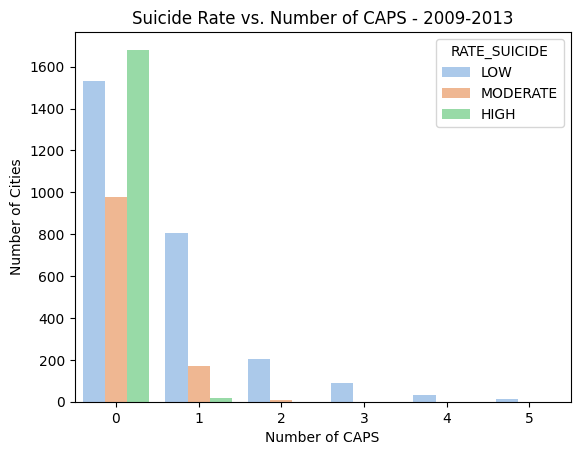

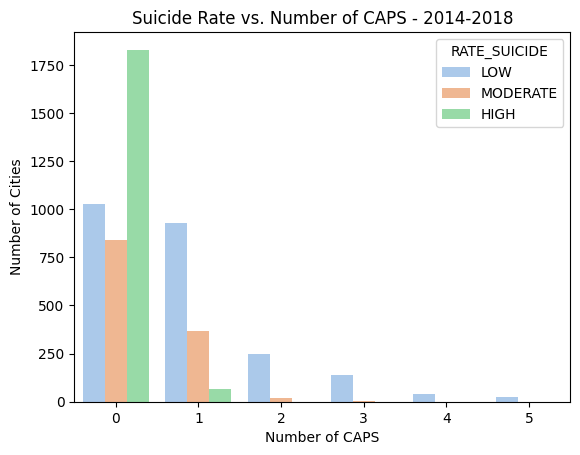

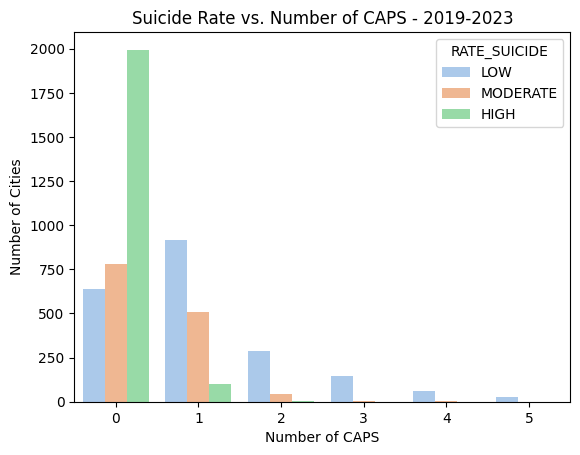

In [58]:
dfs_outliers = [(df3_outliers, '2009-2013'), (df4_outliers, '2014-2018'), (df5_outliers, '2019-2023')]
for df, label in dfs_outliers:
  ax=sns.countplot(data=df, x='CAPS', hue='RATE_SUICIDE',
                 palette='pastel', hue_order=['LOW', 'MODERATE', 'HIGH']
                );
  ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
  plt.title(f'Suicide Rate vs. Number of CAPS - {label}')
  plt.ylabel('Number of Cities')
  plt.xlabel('Number of CAPS')
  plt.savefig(fname=f'Figures_CAPS/CAPS_per_SuicideRate_{label}.png', format='png', dpi=300, bbox_inches='tight')
  plt.show()


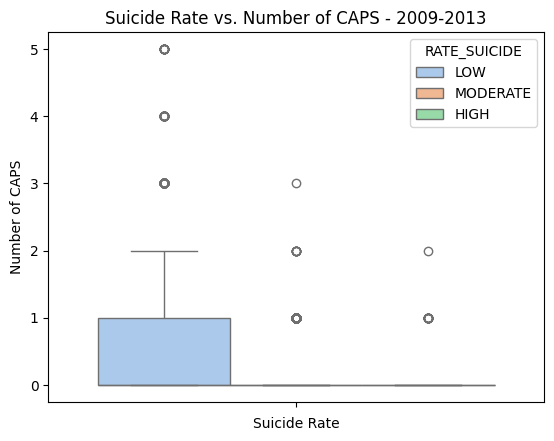

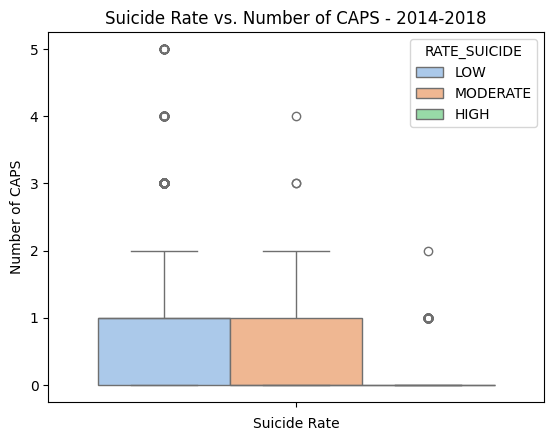

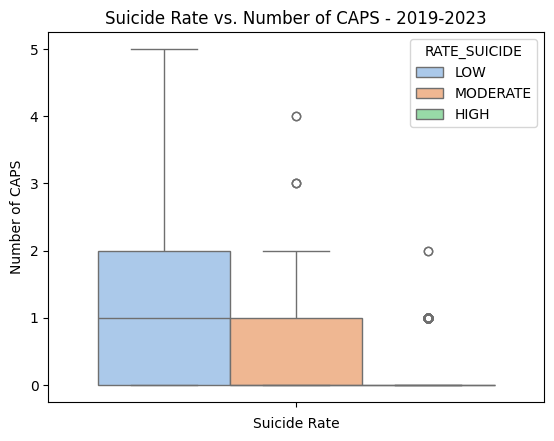

In [59]:
for df, label in dfs_outliers:
  ax= sns.boxplot(data=df, y='CAPS', hue='RATE_SUICIDE',
            palette='pastel', hue_order=['LOW', 'MODERATE', 'HIGH']);
  ax.yaxis.set_major_locator(mticker.MaxNLocator(integer=True))
  plt.title(f'Suicide Rate vs. Number of CAPS - {label}')
  plt.ylabel('Number of CAPS')
  plt.xlabel('Suicide Rate')
  plt.savefig(fname=f'Figures_CAPS/CAPS_SuicideRate_{label}_boxplot.png', format='png', dpi=300, bbox_inches='tight')
  plt.show()


We also computed the Spearman's correlation (since data was not normal) and ploted it.

In [60]:
dfs = [(df3,'2009 to 2013'), (df4, '2014 to 2018'), (df5, '2019 to 2023')]
for df, label in dfs:
  rho, pval = spearmanr(df['RATE'], df['CAPS'], nan_policy='omit')

  print(f'Correlation between number of CAPS and suicide rate from {label}.\n'
        f'Spearman’s rho = {rho:.2f}, p-value = {pval:.4f}\n')

Correlation between number of CAPS and suicide rate from 2009 to 2013.
Spearman’s rho = -0.30, p-value = 0.0000

Correlation between number of CAPS and suicide rate from 2014 to 2018.
Spearman’s rho = -0.41, p-value = 0.0000

Correlation between number of CAPS and suicide rate from 2019 to 2023.
Spearman’s rho = -0.54, p-value = 0.0000



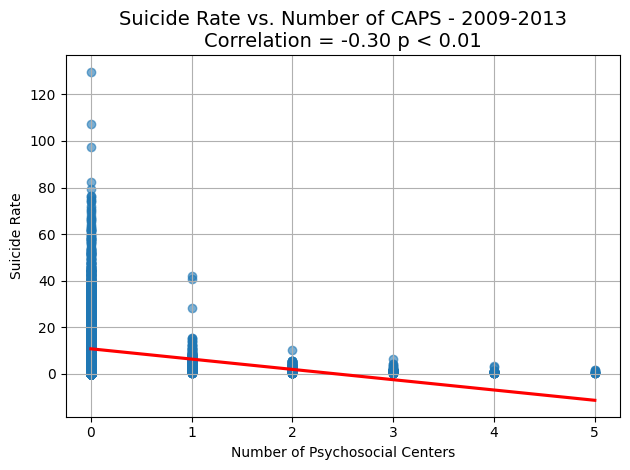

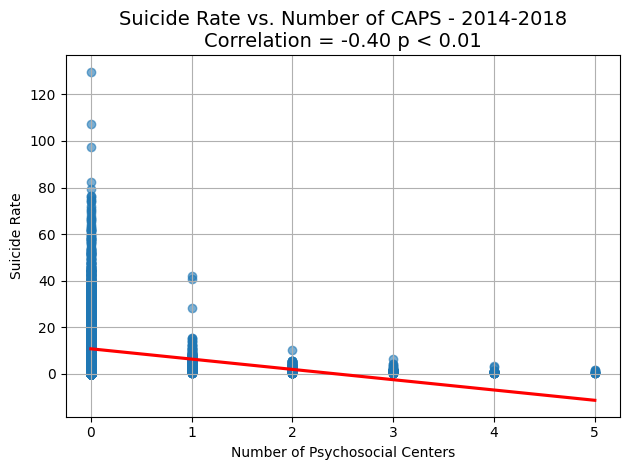

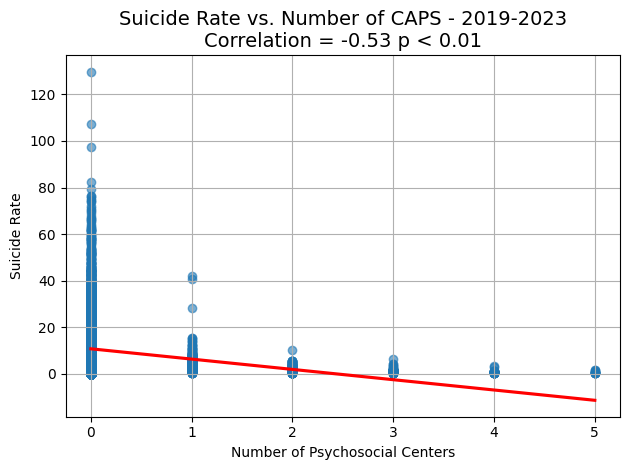

In [61]:
for df, label in dfs_outliers:
  rho, pval = spearmanr(df['RATE'], df['CAPS'], nan_policy='omit')
  ax = sns.regplot(data=df3_outliers, x='CAPS', y='RATE',ci=None,
                   scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
  ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))


  plt.title(f'Suicide Rate vs. Number of CAPS - {label}\nCorrelation = {rho:.2f} p < 0.01', fontsize=14)
  plt.xlabel('Number of Psychosocial Centers')
  plt.ylabel('Suicide Rate')
  plt.grid(True)
  plt.tight_layout()
  plt.savefig(f'Figures_CAPS/Correlation_CAPS_SuicideRate_{label}.png', format='png', dpi=300, bbox_inches='tight')
  plt.show()


Then we plotted the Brazilian maps of each city, considering the number of CAPS per city or the suicide rate per 100 000 inhabitants. To scale the map colors we set the max values as the highest 99% percentile.

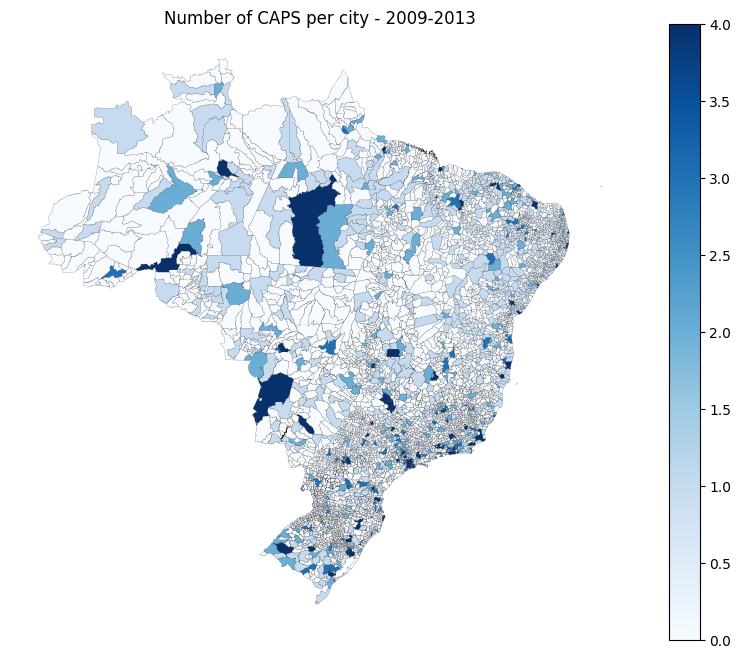

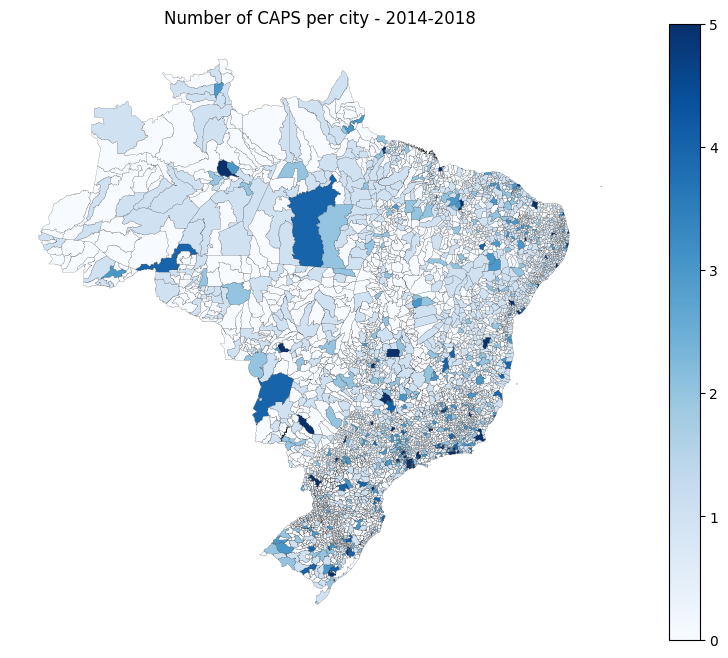

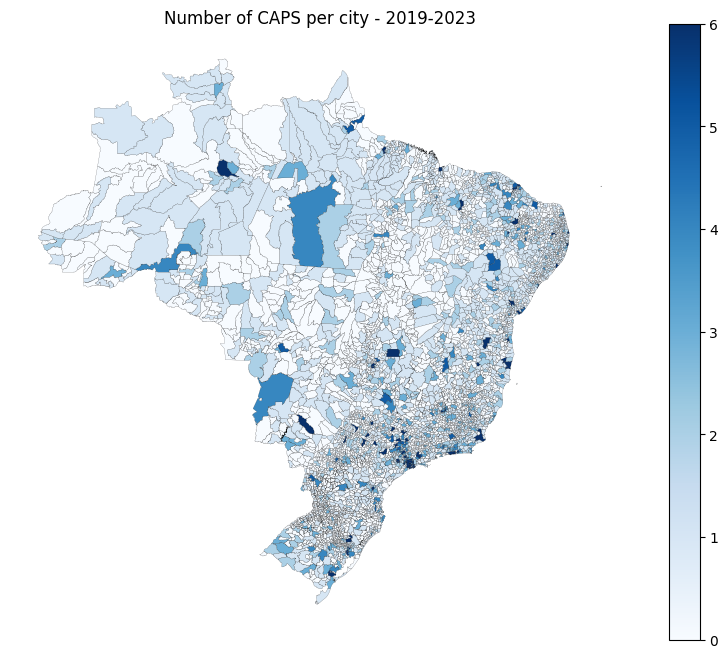

In [62]:
dfs = [(df3, '2009-2013'), (df4, '2014-2018'), (df5, '2019-2023')]
for df, label in dfs:
  fig, ax = plt.subplots(figsize=(10,8))
  vmin, vmax = df['CAPS'].min(),df['CAPS'].quantile(.99)
  colors = plt.cm.Blues((df['CAPS'] - vmin)/(vmax-vmin))
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax)
  df.plot(ax=ax, color=colors, edgecolor='black', linewidth=0.1)
  ax.axis('off')
  plt.title(f'Number of CAPS per city - {label}')
  plt.savefig(fname=f'Figures_CAPS/Brazil_map_CAPS_{label}.png', format='png',
              dpi=300, bbox_inches='tight', transparent=True)
  plt.show();


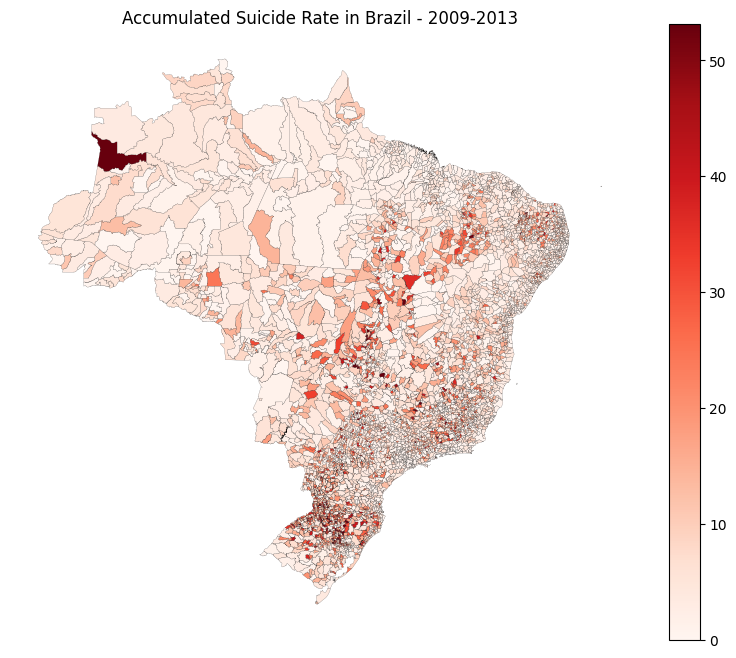

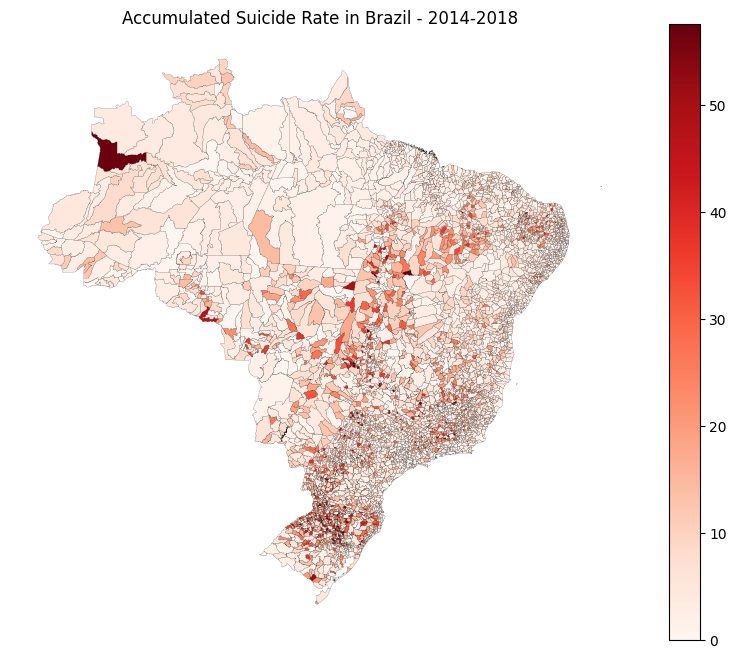

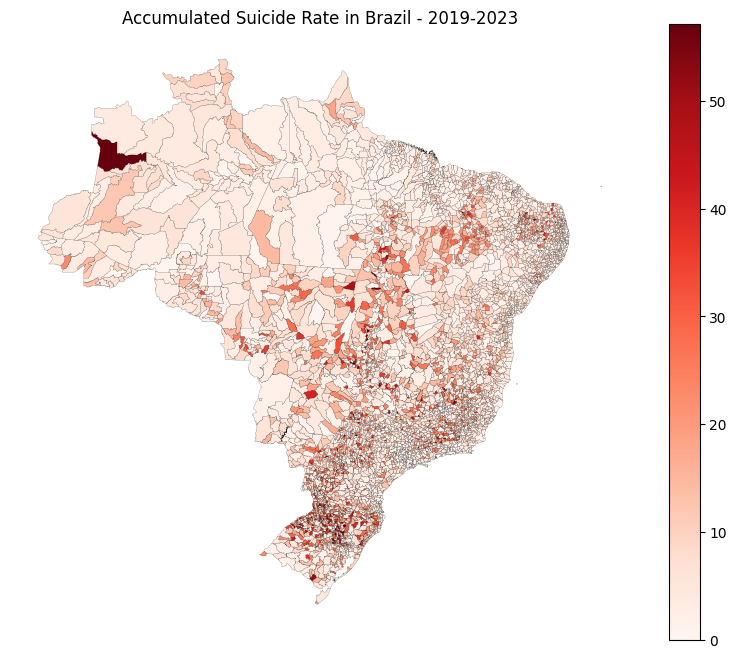

In [63]:
for df, label in dfs:
  fig, ax = plt.subplots(figsize=(10,8))
  vmin, vmax = df['RATE'].min(),df['RATE'].quantile(.99)
  colors = plt.cm.Reds((df['RATE'] - vmin)/(vmax-vmin))
  sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax)
  df.plot(ax=ax, color=colors, edgecolor='black', linewidth=0.1)
  ax.axis('off')
  plt.title(f'Accumulated Suicide Rate in Brazil - {label}')
  plt.savefig(fname=f'Figures_CAPS/Brazil_map_SuicideRate_{label}.png', dpi=300,
              format='png', bbox_inches='tight', transparent=True)
  plt.show();


In [64]:
!zip -r Figures_CAPS.zip Figures_CAPS/

  adding: Figures_CAPS/ (stored 0%)
  adding: Figures_CAPS/CAPS_SuicideRate_2014-2018_boxplot.png (deflated 21%)
  adding: Figures_CAPS/Correlation_CAPS_SuicideRate_2019-2023.png (deflated 14%)
  adding: Figures_CAPS/Correlation_CAPS_SuicideRate_2014-2018.png (deflated 14%)
  adding: Figures_CAPS/Brazil_map_CAPS_2009-2013.png (deflated 2%)
  adding: Figures_CAPS/CAPS_SuicideRate_2019-2023_boxplot.png (deflated 21%)
  adding: Figures_CAPS/CAPS_SuicideRate_2009-2013_boxplot.png (deflated 21%)
  adding: Figures_CAPS/Correlation_CAPS_SuicideRate_2009-2013.png (deflated 14%)
  adding: Figures_CAPS/Brazil_map_CAPS_2014-2018.png (deflated 2%)
  adding: Figures_CAPS/Brazil_map_SuicideRate_2019-2023.png (deflated 1%)
  adding: Figures_CAPS/Brazil_map_SuicideRate_2009-2013.png (deflated 1%)
  adding: Figures_CAPS/Brazil_map_CAPS_2019-2023.png (deflated 2%)
  adding: Figures_CAPS/Brazil_map_SuicideRate_2014-2018.png (deflated 1%)
  adding: Figures_CAPS/CAPS_per_SuicideRate_2014-2018.png (deflated